**Problem Statement:**
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.**BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.They want to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### we will be following the given steps to in order to get to the solution.
- DATA reading & understanding
- EDA
- Modelling
    - Data scaling (normalisation or standardisation)
    - model building (linear regression model)
    - model evaluation
- Interpretation and Suggestion to business

### Data Reading & Understanding

In [1]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Let's check the columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check null values by columns
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**No null values present in data so we are good to go.**

In [7]:
# Let's describe the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dropping unnecessory columns or features.
 - Drop instant column : It's just a index column, so no use for us
 - Drop dteday column : This data cannot be used as a model because it is already represented as year, month, business day and business day.
  - Drop casual and registered : The dependent or target variable is cnt and it is nothing but the sum of these two columns, so keep these two columns constant (no  analysis is required on this basis of registered/subscribe)

In [8]:
df.drop(['instant','dteday','casual','registered'],axis = 'columns',inplace= True)

In [9]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
df.shape

(730, 12)

In [11]:
#naming the seasons as per their codes provided and also the month names

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [12]:
df.mnth.value_counts()

jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: mnth, dtype: int64

In [13]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
df.weathersit.unique()

array([2, 1, 3], dtype=int64)

**our dataset doesnt contain the heavy rain or ice pallets and thunderstorm condition because this is a bikers data, Bikers not able to drive vehicle in such condition**

In [15]:
#so lets just map 1,2,3 as model will not learn anything from 4 condition (no data present at all)
df.weathersit = df.weathersit.map({1:'clear',2:'cloudy',3:'light_rain'})

## Exploratory Data Analysis (EDA)

''

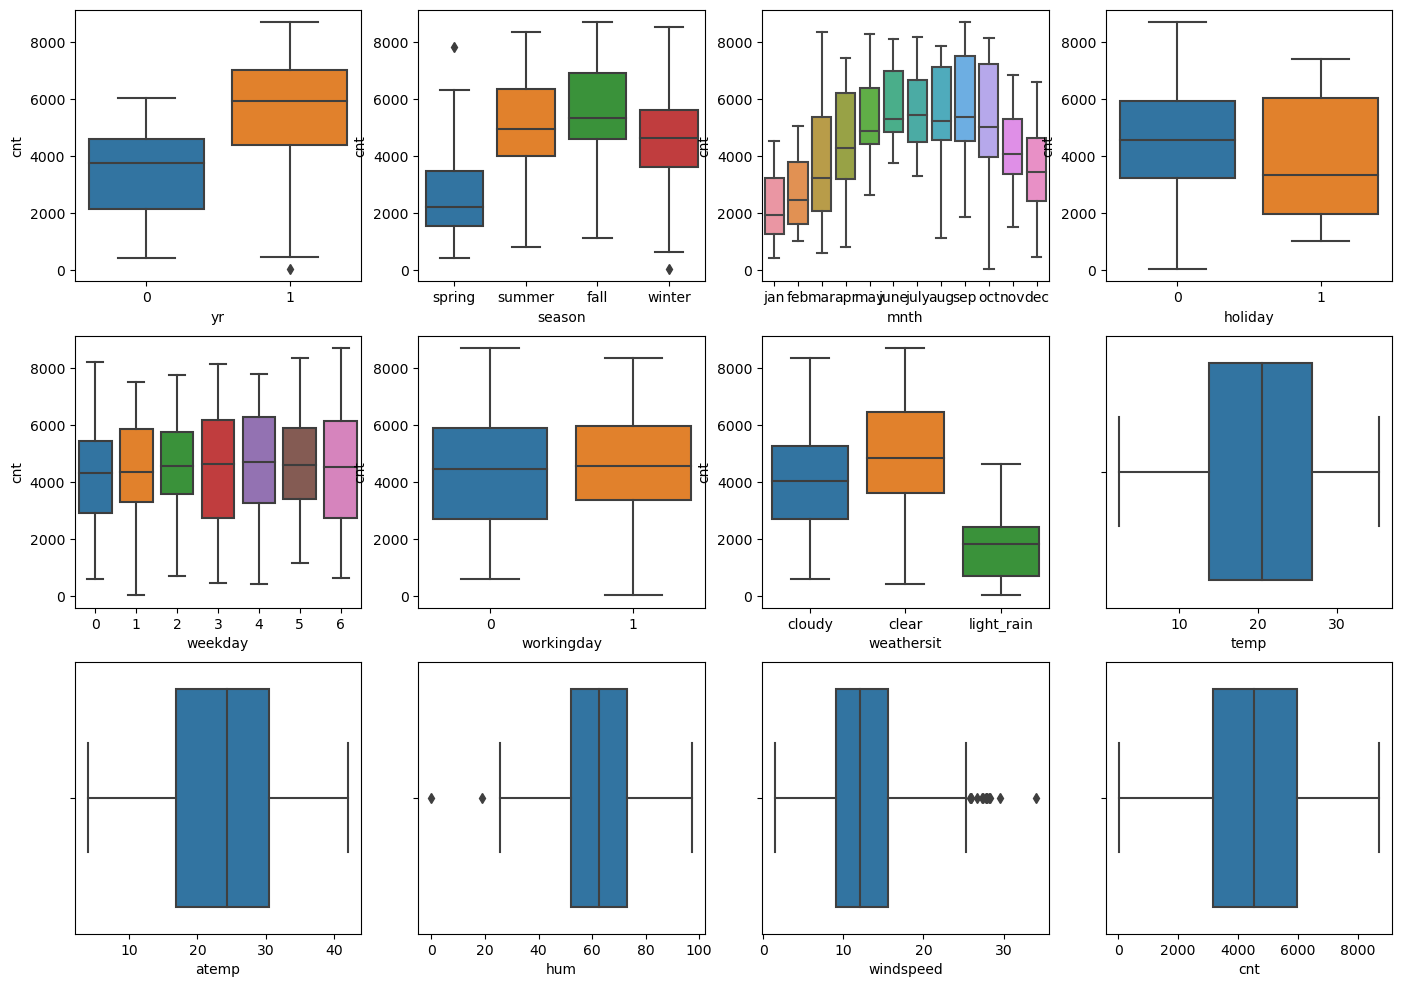

In [16]:
# Spotting/Observing the outliers

plt.figure(figsize=(17,12))

plt.subplot(3,4,1)
sns.boxplot(data= df,x='yr',y='cnt'),

plt.subplot(3,4,2)
sns.boxplot(data= df,x='season',y='cnt'),

plt.subplot(3,4,3)
sns.boxplot(data= df,x='mnth',y='cnt'),

plt.subplot(3,4,4)
sns.boxplot(data= df,x='holiday',y='cnt'),

plt.subplot(3,4,5)
sns.boxplot(data= df,x='weekday',y='cnt'),

plt.subplot(3,4,6)
sns.boxplot(data= df,x='workingday',y='cnt'),

plt.subplot(3,4,7)
sns.boxplot(data= df,x='weathersit',y='cnt'),

plt.subplot(3,4,8)
sns.boxplot(data= df,x='temp'),

plt.subplot(3,4,9)
sns.boxplot(data= df,x='atemp'),

plt.subplot(3,4,10)
sns.boxplot(data= df,x='hum'),

plt.subplot(3,4,11)
sns.boxplot(data= df,x='windspeed'),

plt.subplot(3,4,12)
sns.boxplot(data= df,x='cnt'),

;

**Inferences :**

- The data looks very balanced because there are very few outliers
- Only weather conditions such as humidity, wind speed etc. are negatively affected, there are outliers which is natural, so we will keep it.
- Month and cnt to clearly show dropping cnt after august month.
- The Weathersit boxplot shows that clear weathersit has the highest median and light rain (and thunderstorms) has the lowest average, which is understandable.

''

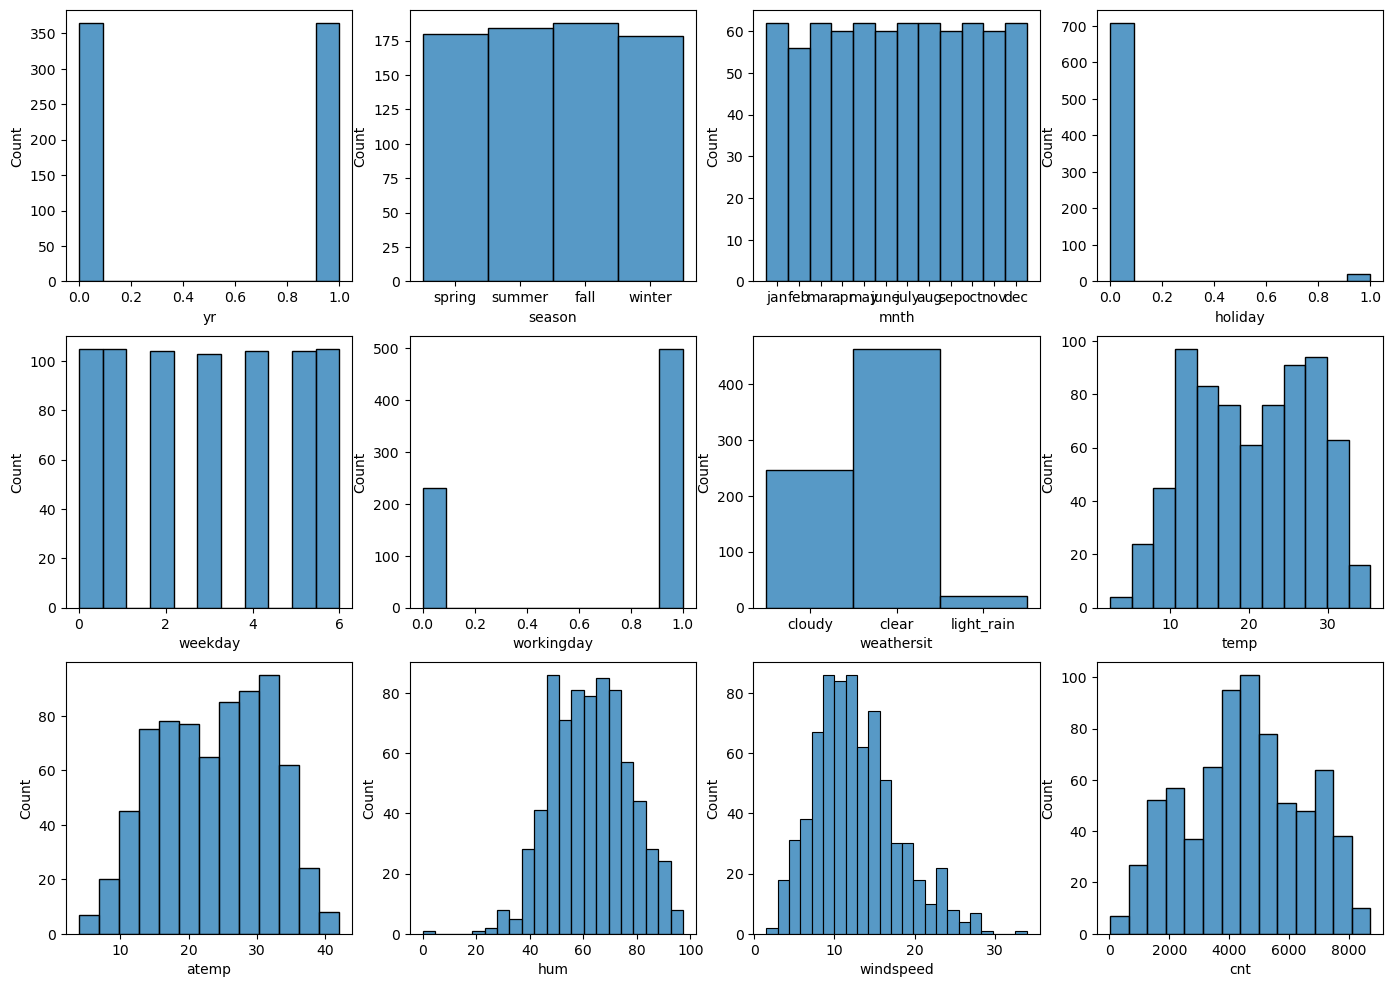

In [17]:
#lets check distributions of the features
plt.figure(figsize=(17,12))

plt.subplot(3,4,1)
sns.histplot(data= df,x='yr'),

plt.subplot(3,4,2)
sns.histplot(data= df,x='season'),

plt.subplot(3,4,3)
sns.histplot(data= df,x='mnth'),

plt.subplot(3,4,4)
sns.histplot(data= df,x='holiday'),

plt.subplot(3,4,5)
sns.histplot(data= df,x='weekday'),

plt.subplot(3,4,6)
sns.histplot(data= df,x='workingday'),

plt.subplot(3,4,7)
sns.histplot(data= df,x='weathersit'),

plt.subplot(3,4,8)
sns.histplot(data= df,x='temp'),

plt.subplot(3,4,9)
sns.histplot(data= df,x='atemp'),

plt.subplot(3,4,10)
sns.histplot(data= df,x='hum'),

plt.subplot(3,4,11)
sns.histplot(data= df,x='windspeed'),

plt.subplot(3,4,12)
sns.histplot(data= df,x='cnt'),

;

**Inference**
- No anomalies were detected, most of the graphs were distributed regularly and no distortions or outliers were found.

In [18]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Bivariate Analysis

<Figure size 2000x1500 with 0 Axes>

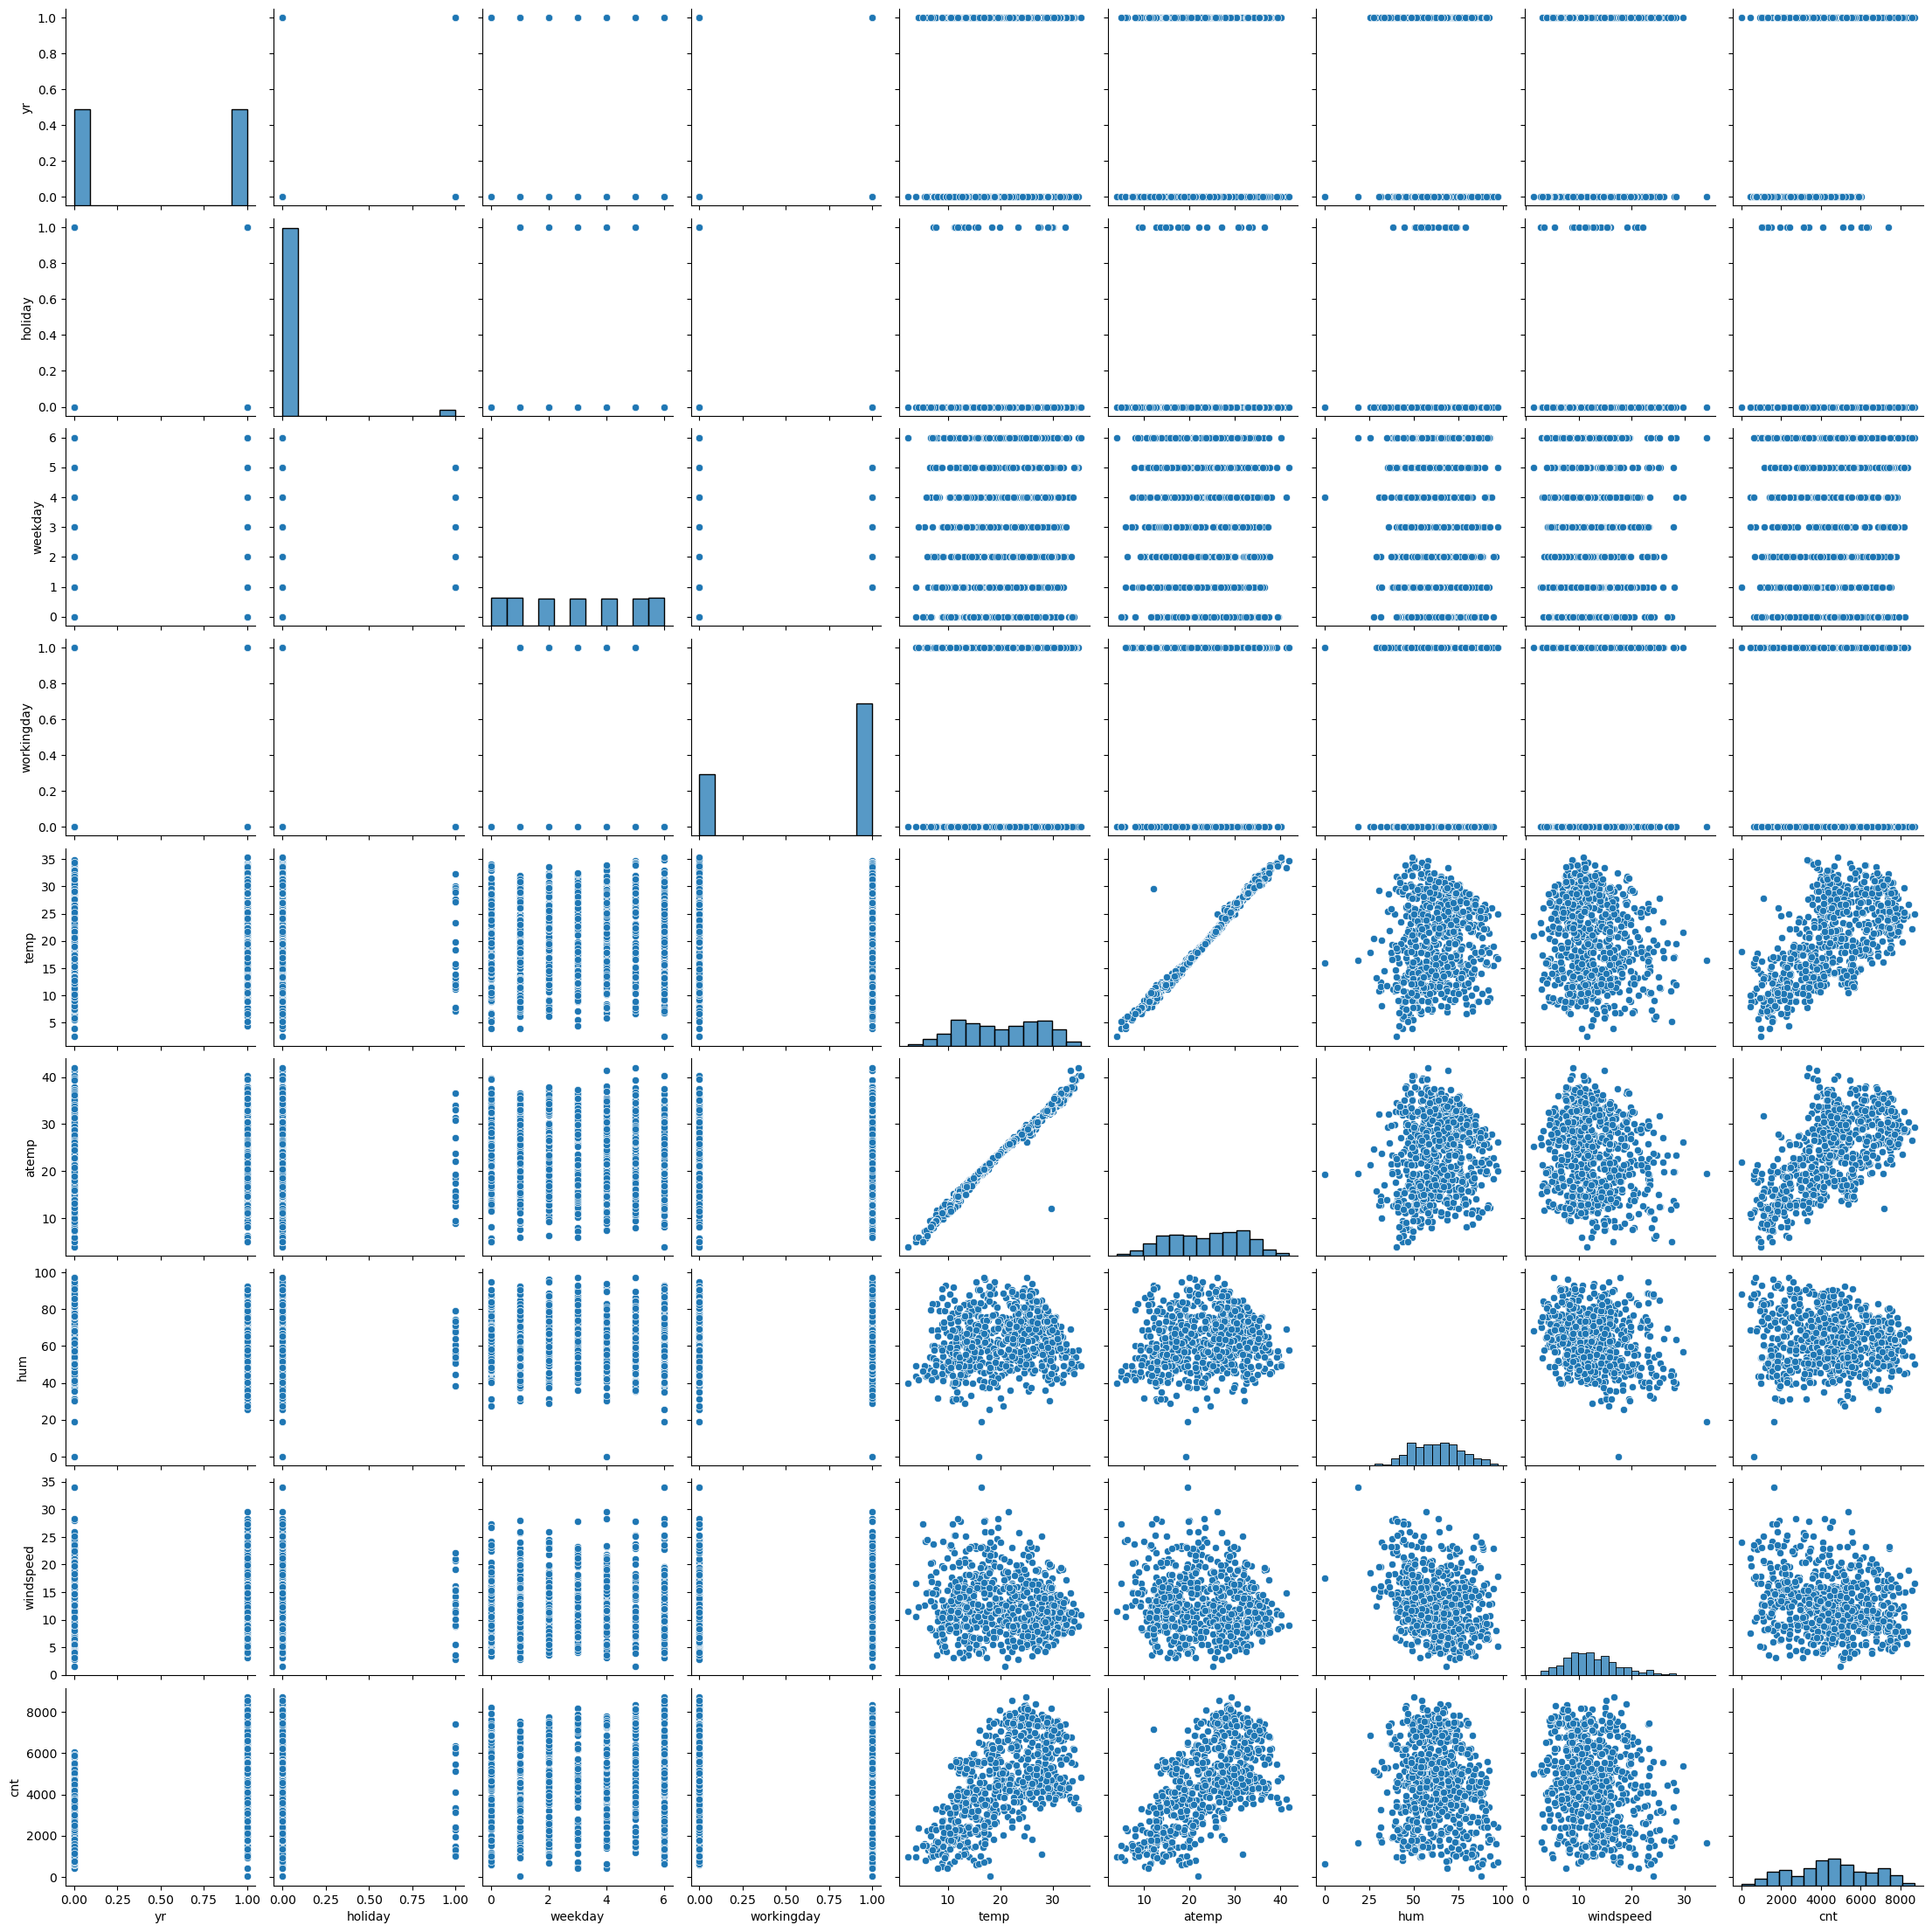

In [19]:
# using pairplots
plt.figure(figsize=(20,15))
sns.pairplot(df);

**Inference:**
- It looks like the atemp and temp features have a linear relationship with our target variables
- atemp and temp seem linear, they definitely have a high correlation (we'll check later to make sure)
- Nothing seems right so we can proceed further.

**We need to do data modifications/ data preparation to feed our algorithm** 

Converting categorical variables into numeric variables using dummy variable method

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Season,weekday,weathersit,month are the categorical variables, we will keep the binary variables as it is.

In [21]:
df = pd.get_dummies(data=df, columns=['season','weekday','weathersit','mnth'],drop_first=True)

In [22]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_cloudy', 'weathersit_light_rain', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  weekday_1              730 non-null    uint8  
 12  weekday_2              730 non-null    uint8  
 13  weekday_3              730 non-null    uint8  
 14  weekday_4              730 non-null    uint8  
 15  weekda

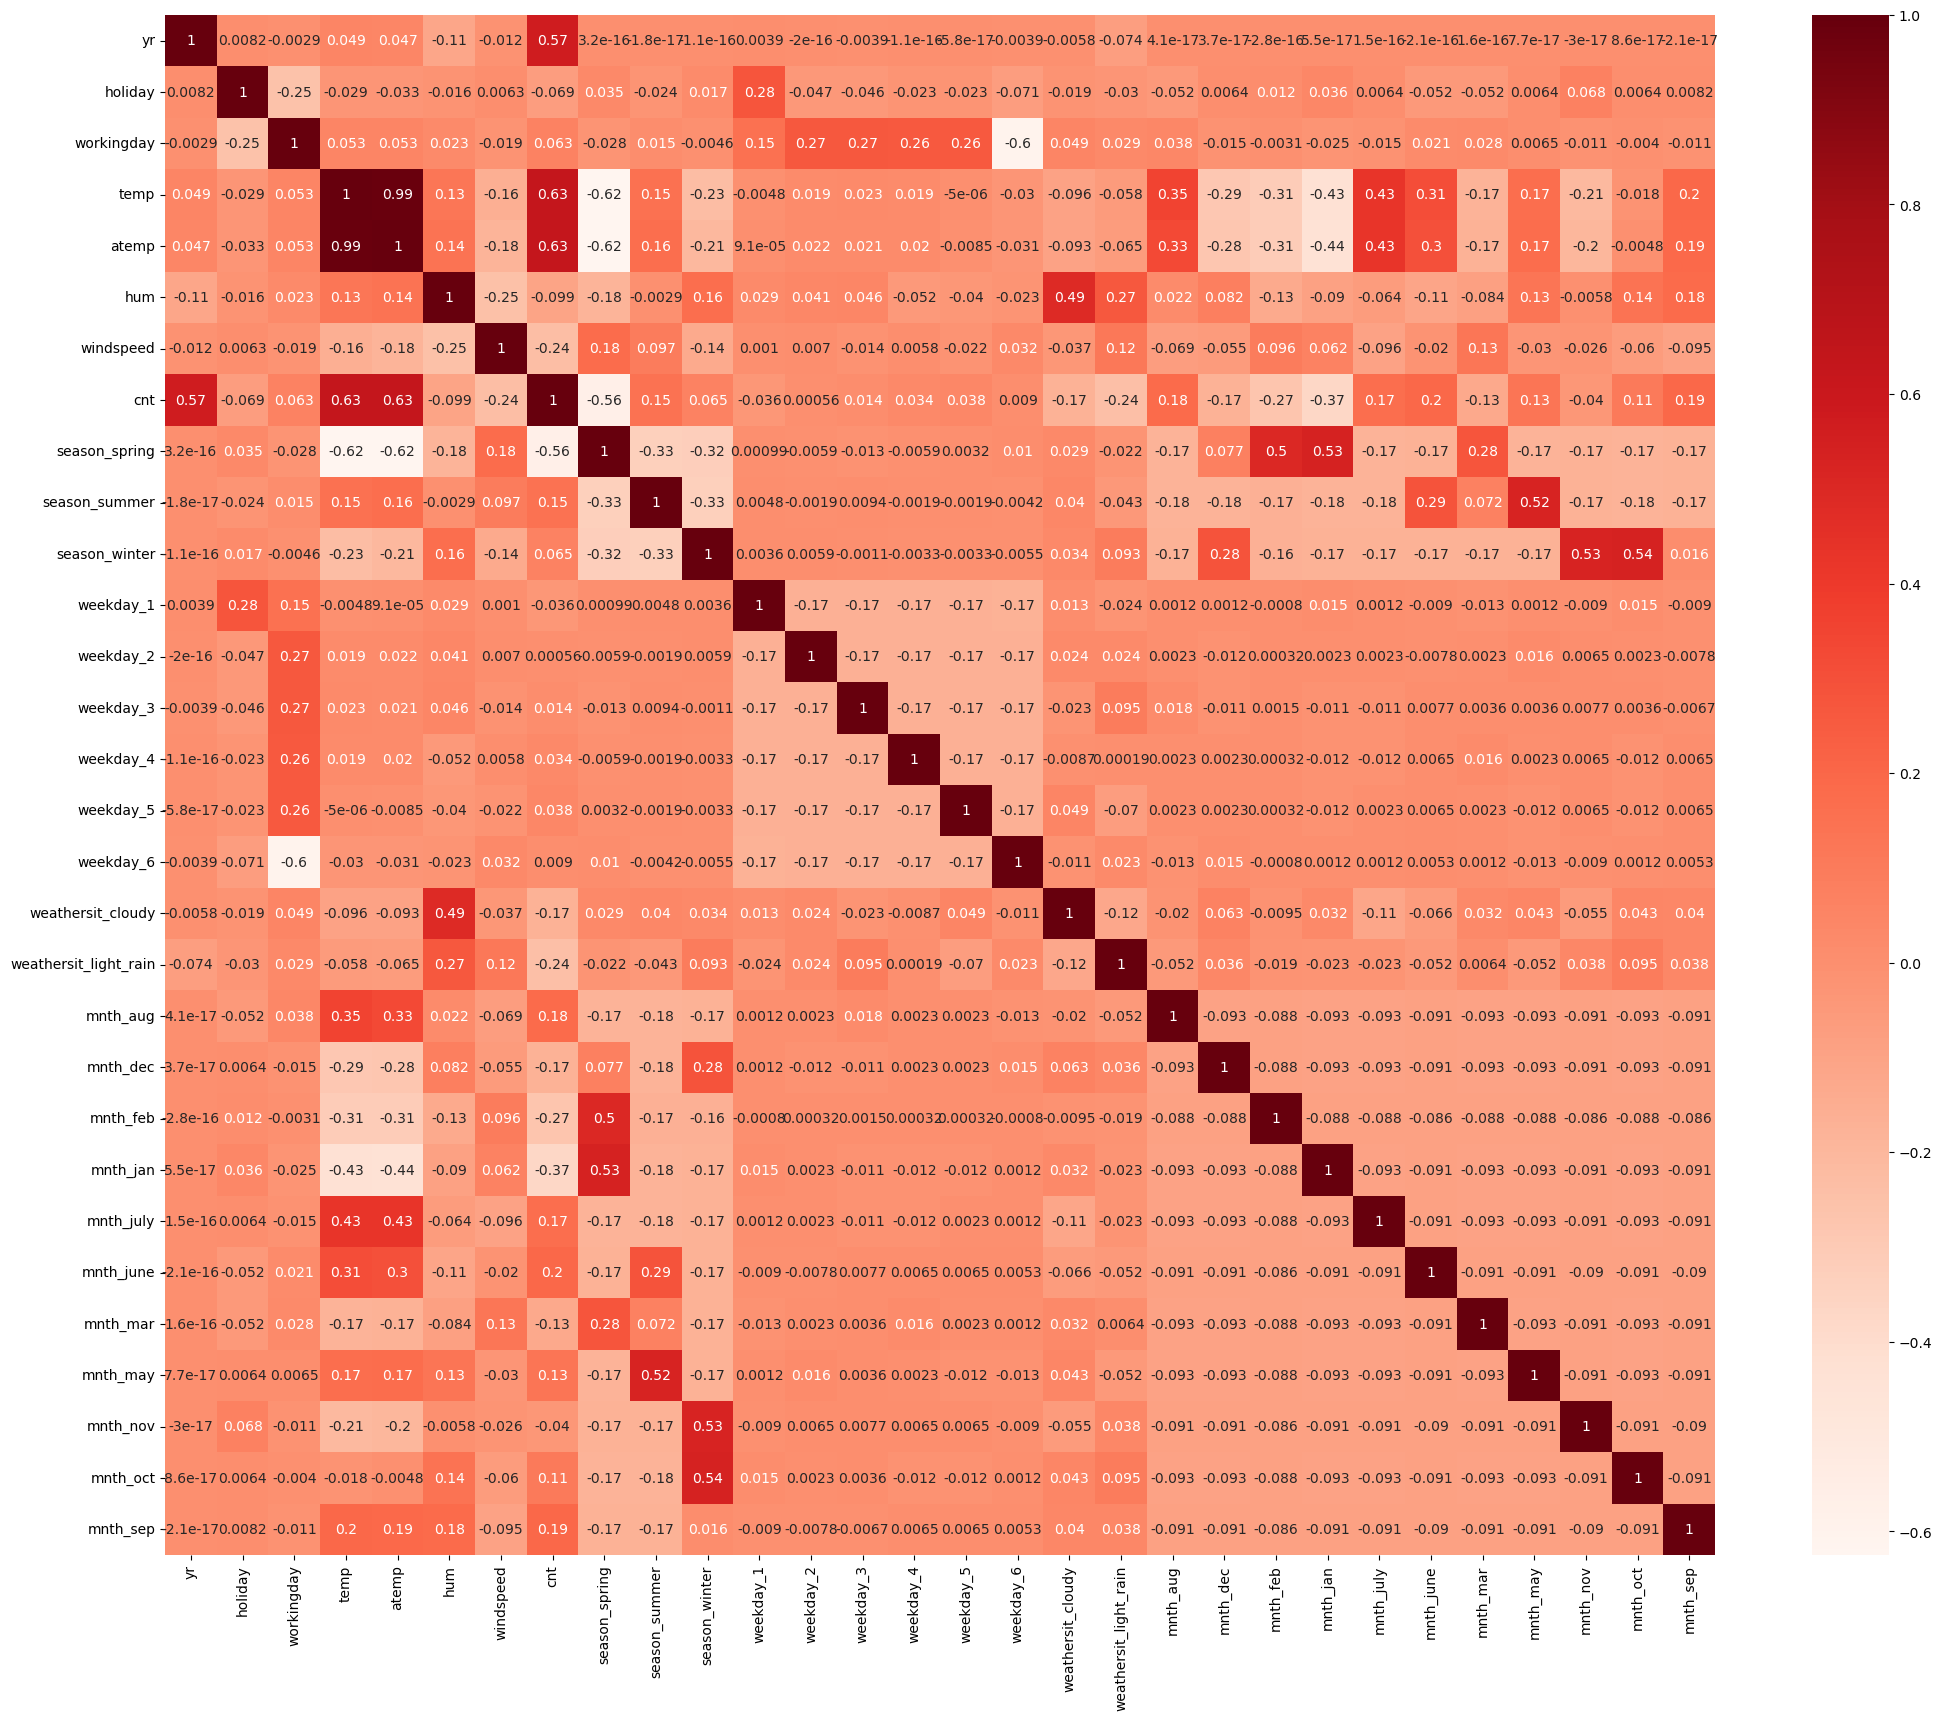

In [25]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='Reds');

**Inference:**
- yr has a good correlation with cnt and temp and atemp also have a high correlation with cnt so we can do a linear regression model.
- There is almost no correlation between the features except temp and atemp (0.99), which leads to multicollinearity, so we will drop one of the two and the other will be fine.
    - temp is the absolute temperature in degrees Celsius (dry bulb temperature), while atemp is the "feeling temperature in Celsius" temperature (or wet bulb temperature)

In [26]:
# drop temp column
df.drop(columns='temp',axis='columns',inplace=True)

In [27]:
df.shape

(730, 29)

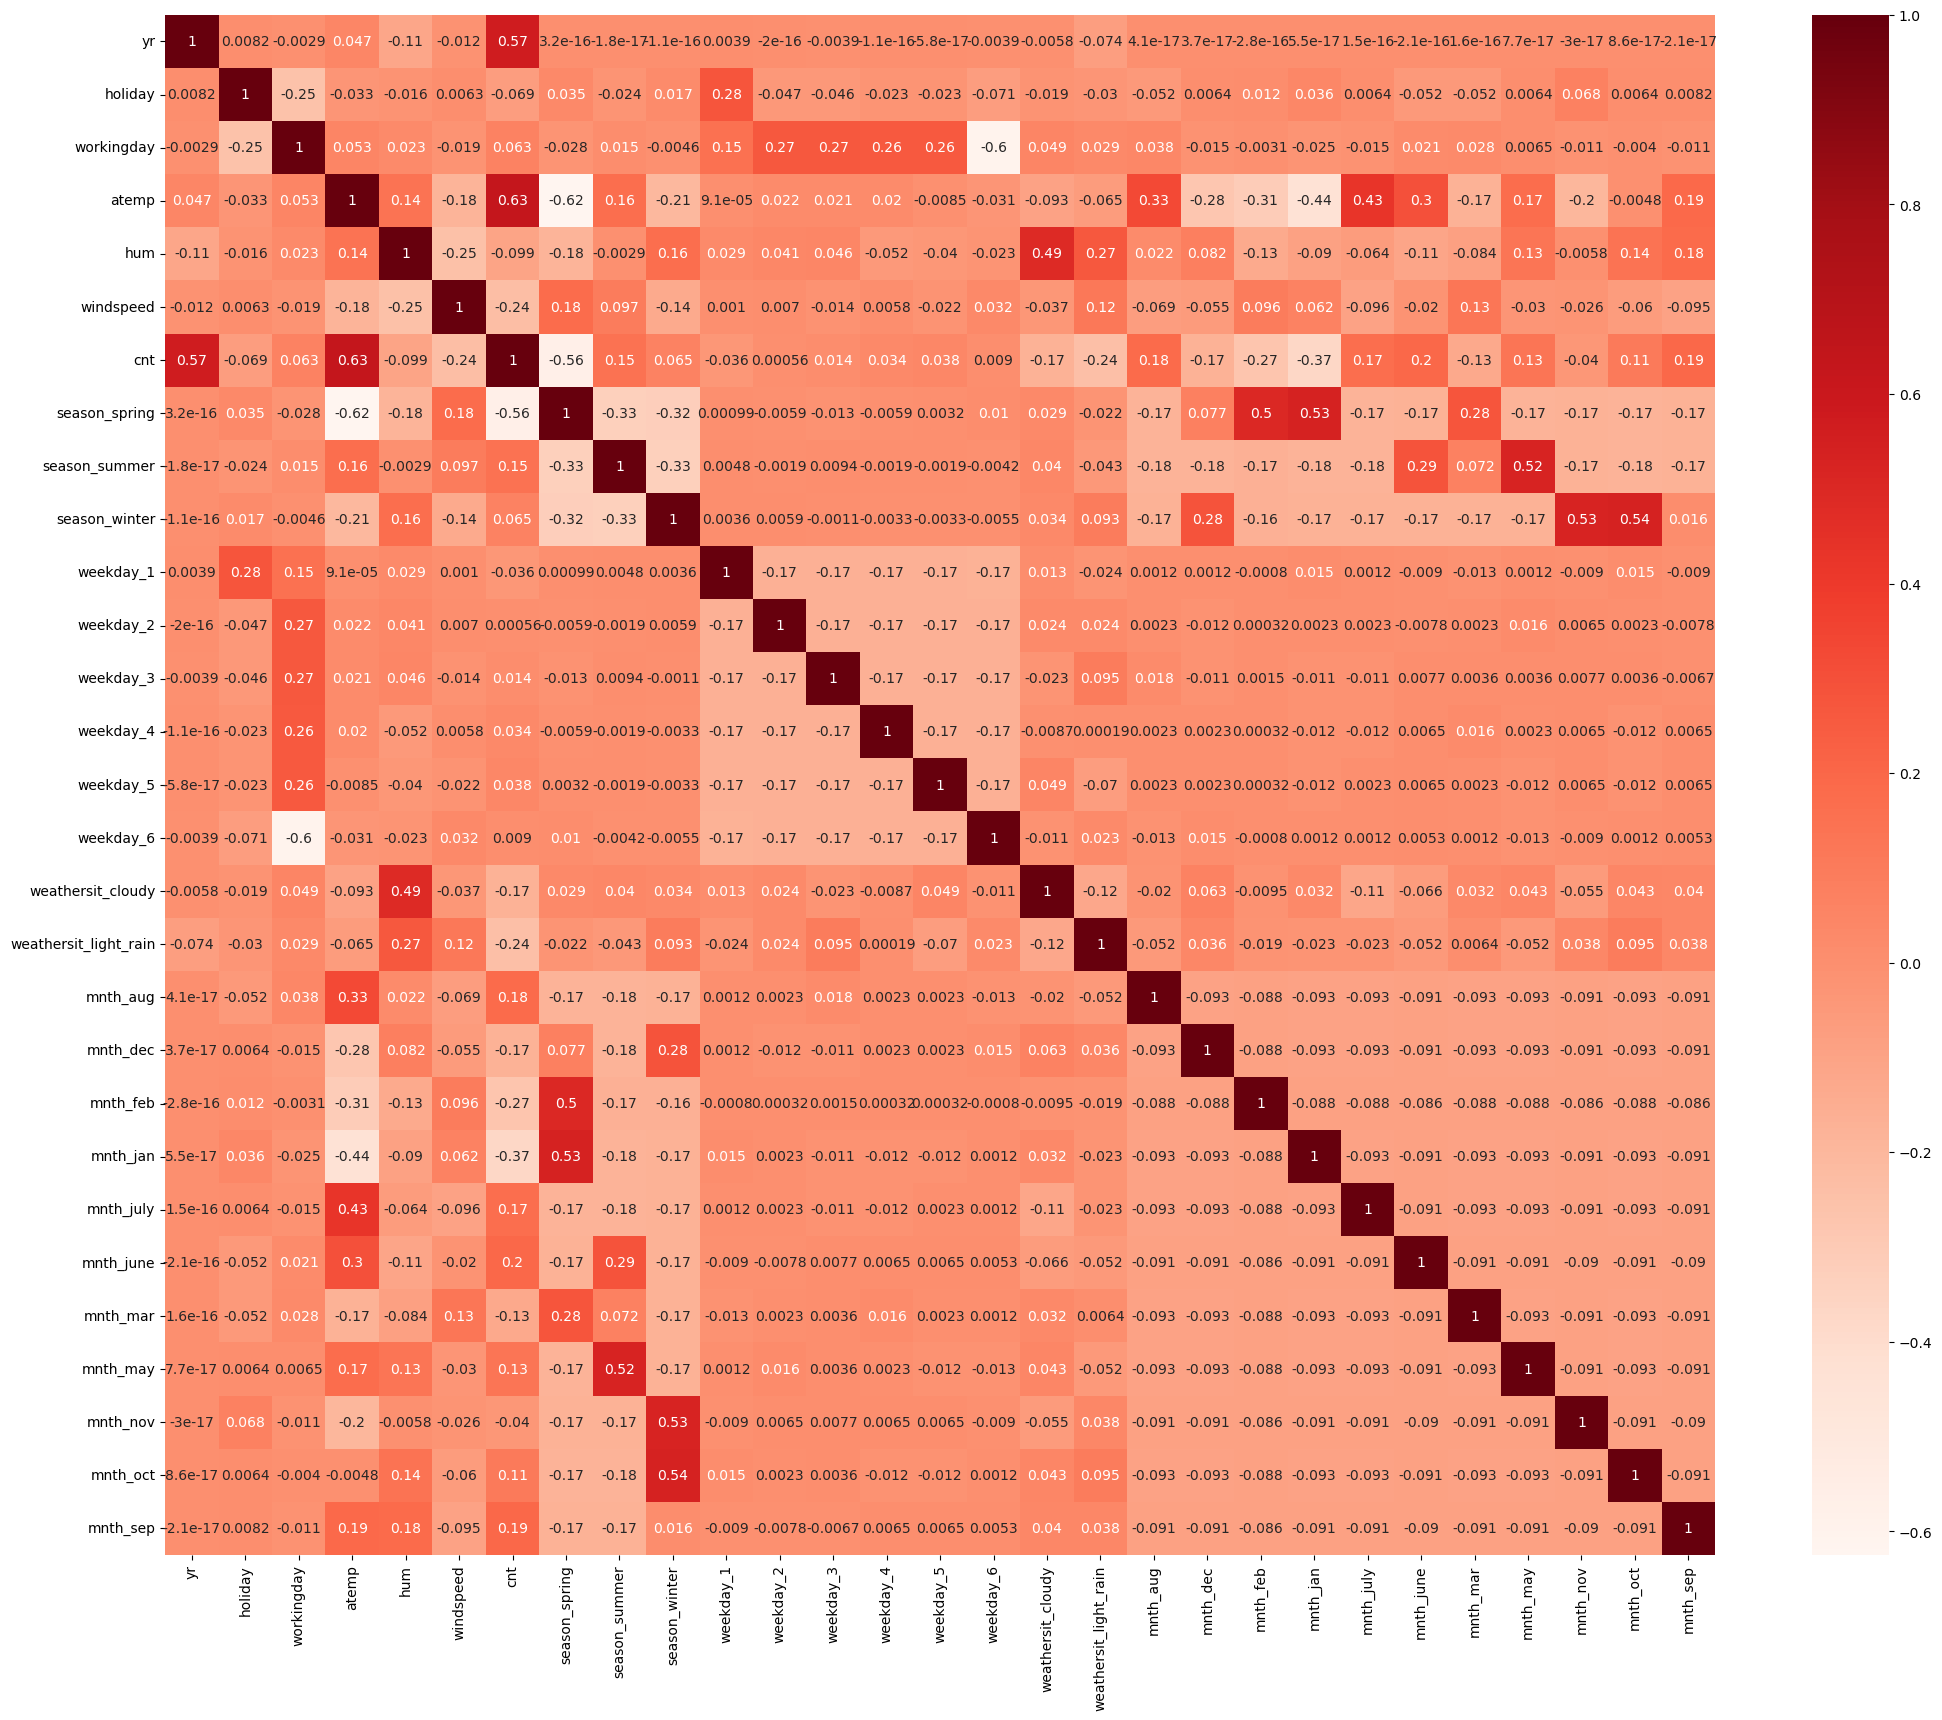

In [28]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df.corr(),annot=True,cmap='Reds');

**We finetune the correlation between atemp and temp**

## Model Building

If the features have many variables, it will affect the interpretation even if it does not affect the model (for large values, the coefficients change slightly), so let's measure the data first to make it simple to measure the model.


In [29]:
# importing library from sklearn 
from sklearn.preprocessing import MinMaxScaler

In [30]:
scalr = MinMaxScaler()

In [31]:
# There is no use of scaling the binary variables, so we will just scale other numeric variables
df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_cloudy', 'weathersit_light_rain', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep'],
      dtype='object')

In [32]:
num_vars = ['atemp','hum','windspeed','cnt']
df[num_vars] = scalr.fit_transform(df[num_vars])

In [33]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
0,0,0,0,0.373517,0.828620,0.284606,0.110792,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0.360541,0.715771,0.466215,0.089623,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0.144830,0.449638,0.465740,0.152669,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.174649,0.607131,0.284297,0.177174,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0.197158,0.449313,0.339143,0.181546,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Spliting data into the training and testing sets

In [34]:
# Importing scikitlearn library 
from sklearn.model_selection import train_test_split

In [35]:
#y is contain only target variable
y = df.pop("cnt")
#X is all remainign variable also our independent variables
X = df

In [36]:
print(X.shape)
print(y.shape)

(730, 28)
(730,)


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(510, 28)
(220, 28)
(510,)
(220,)


In [39]:
# we will use statsmodel for model building as it gives more stastical results for understanding purpose only
# but for feature selection we will use automated RFE (also results are almost same as LinearRegressor from scikitlearn)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()

## Feature Selection

We have 28 features and this is a huge number because our models tend to be overloaded, so we will try to reduce features as much as possible to increase accuracy or reduce right-hand impact.

we will follow mixed approach

- coarse tuning by automated approach
    - Recursive Feature Elimination from sklearn
- fine tuning by manual approach
    - statistical regection using VIF,F-stat,p-values etc in stastsmodel

### Step 1 - Automated Feature Selection 

In [42]:
from sklearn.feature_selection import RFE

In [43]:
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)

In [44]:
X_train.columns[rfe.get_support()]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'weekday_6', 'weathersit_cloudy',
       'weathersit_light_rain', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_sep'],
      dtype='object')

In [45]:
rfe.score(X_train,y_train)

0.8447923336701773

**very solid score I actually tried different numbers and 16 gives by far the best score using somewhat less features (21 is best, as per RFECV)**

In [46]:
list(zip(X_train.columns,rfe.get_support(),rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 3),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_1', False, 7),
 ('weekday_2', False, 8),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light_rain', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', False, 6),
 ('mnth_june', False, 5),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 4),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1)]

In [47]:
#lets see which columns are suggested by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'weekday_6', 'weathersit_cloudy',
       'weathersit_light_rain', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_sep'],
      dtype='object')

### Step 2 - Manual Feature Selection

In [48]:
# we will use statsmodel for this step as it has .summery() feature which  tells the whole stat,
# which will be used by us for decision making 

In [49]:
import statsmodels.api as sm

In [50]:
# lets make model using the ref suggested columns (16)
X_train = X_train[col]
X_test = X_test[col]
# for x-intercept we need to add constant column, as statmodel takes origin as intercept for the hypothesis line (which is not always the case)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


In [51]:
print(X_train.shape)
print(X_test.shape)

(510, 17)
(220, 17)


In [52]:
# Ordinary Least Squares method is used to make this model 
# Running the linear model
lm1 = sm.OLS(y_train,X_train).fit()   

In [53]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     167.7
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.38e-187
Time:                        13:14:18   Log-Likelihood:                 513.96
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     493   BIC:                            -921.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [54]:
#lets check VIF also to have better understanding 
#lets just make it a custom function as we will need it again and again 

from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif = pd.DataFrame()
    X = X_train.drop(columns=['const'])   #local dropping, it wont change the actual df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [55]:
VIF(X_train)

,Features,VIF
4,hum,25.38
3,atemp,14.59
2,workingday,5.22
5,windspeed,4.74
7,season_winter,2.42
6,season_summer,2.30
9,weathersit_cloudy,2.22
0,yr,2.07
8,weekday_6,1.96
14,mnth_jan,1.95


okay so our first model has good R-squared score as well as good adjusted R-squared score

- variance inflation factor of hum and atemp is very high, but we do not delete both simultaneously as stats change after deletion
- p-values of almost all the variables are under acceptance level

In [56]:
# dropping humidity 

X_train.drop(columns=['hum'],inplace=True)
X_test.drop(columns=['hum'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 16)
(220, 16)


In [57]:
lm2 = sm.OLS(y_train,X_train).fit()

In [58]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          3.09e-185
Time:                        13:14:18   Log-Likelihood:                 505.64
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     494   BIC:                            -911.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [59]:
VIF(X_train)

,Features,VIF
3,atemp,6.74
2,workingday,5.06
4,windspeed,4.66
5,season_summer,2.12
0,yr,2.06
7,weekday_6,1.93
6,season_winter,1.87
10,mnth_aug,1.60
8,weathersit_cloudy,1.59
13,mnth_jan,1.44


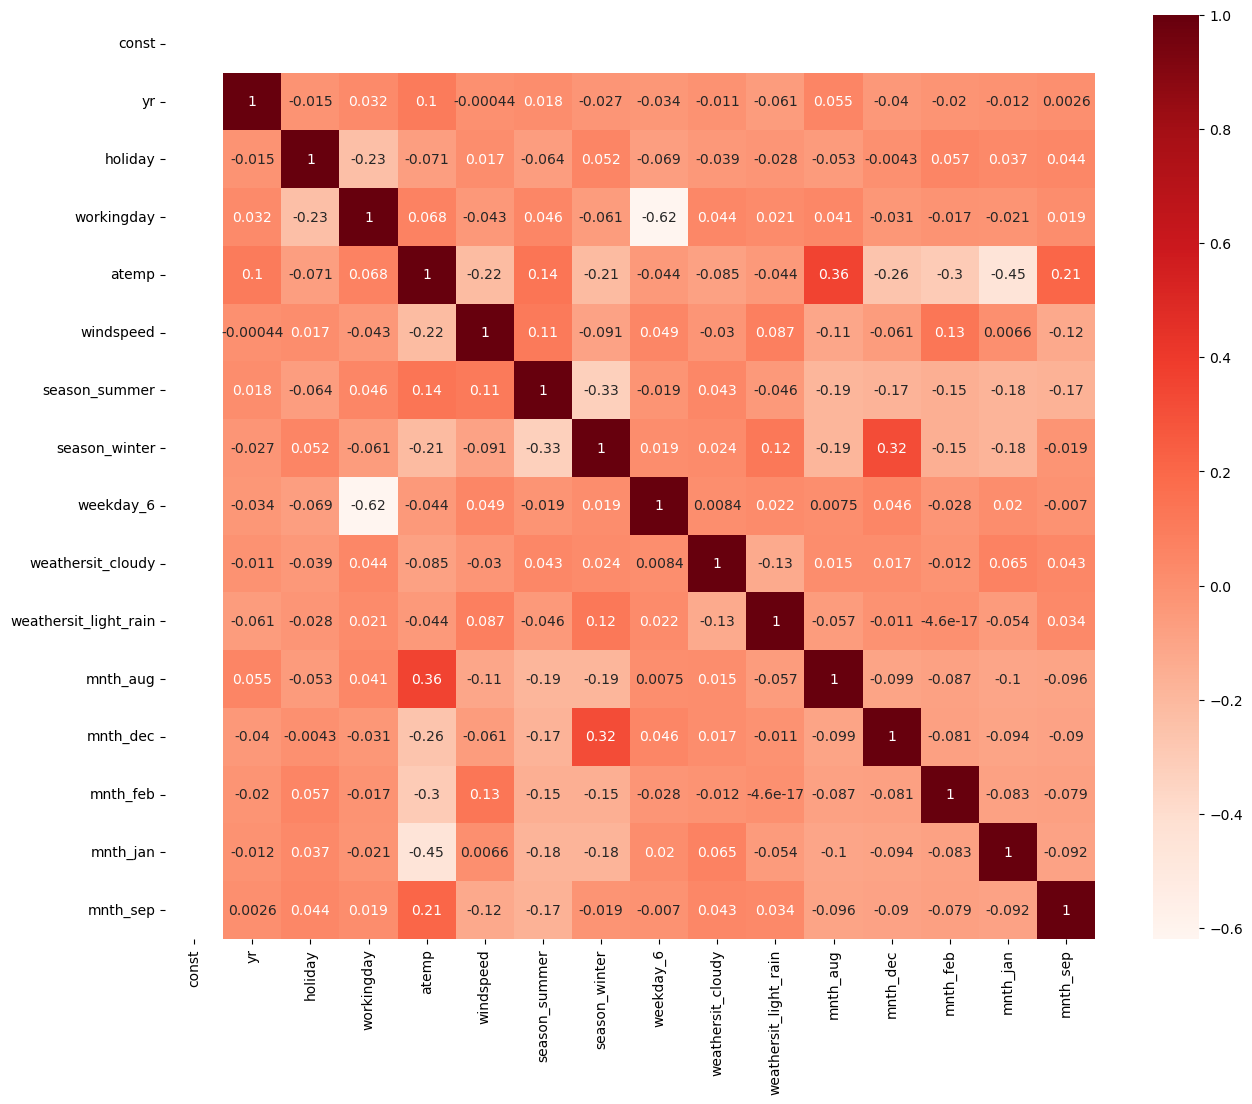

In [60]:
plt.figure(figsize=(15,12))

sns.heatmap(X_train.corr(), annot=True, cmap='Reds');

high correlation between nov - season winter and jan - season spring
- lets keep season winter and season spring as they are more explainable to business

In [61]:
X_train.drop(columns=['mnth_jan','mnth_feb'],inplace=True)
X_test.drop(columns=['mnth_jan','mnth_feb'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 14)
(220, 14)


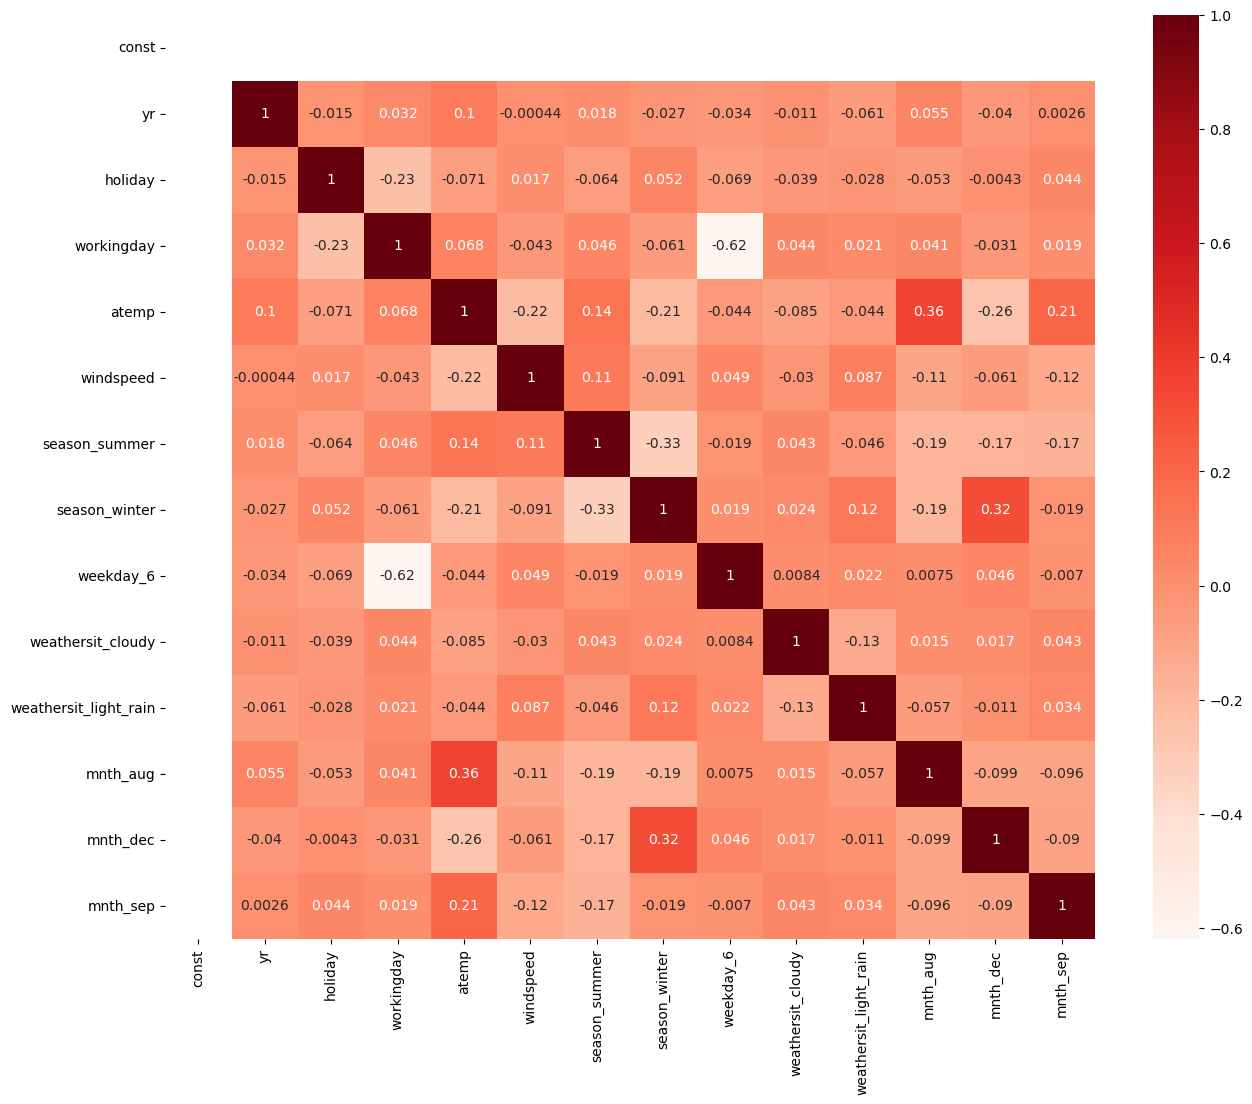

In [62]:
plt.figure(figsize=(15,12))

sns.heatmap(X_train.corr(), annot=True, cmap='Reds');

looks okay to me, august and atemp as correlation, its not too high but lets think after we evaluate new model

In [63]:
lm3 = sm.OLS(y_train,X_train).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.48e-184
Time:                        13:14:23   Log-Likelihood:                 498.55
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     496   BIC:                            -909.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

In [64]:
VIF(X_train)

,Features,VIF
3,atemp,6.26
2,workingday,4.53
4,windspeed,4.10
0,yr,2.02
5,season_summer,1.84
7,weekday_6,1.82
6,season_winter,1.68
8,weathersit_cloudy,1.55
10,mnth_aug,1.55
12,mnth_sep,1.31


the R-squared value has decreased by just a margin, and other parameters are also good

mnth_dec has p value greater than our threshold so lets delete that and see how model performs

In [65]:
X_train.drop(columns=['mnth_dec'],inplace=True)
X_test.drop(columns=['mnth_dec'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 13)
(220, 13)


In [68]:
lm4 = sm.OLS(y_train,X_train).fit()

In [69]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     208.9
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          2.43e-185
Time:                        13:16:33   Log-Likelihood:                 497.63
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     497   BIC:                            -914.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

In [70]:
VIF(X_train)

,Features,VIF
3,atemp,6.22
2,workingday,4.46
4,windspeed,4.10
0,yr,2.02
5,season_summer,1.83
7,weekday_6,1.79
8,weathersit_cloudy,1.55
10,mnth_aug,1.55
6,season_winter,1.53
11,mnth_sep,1.30


In [74]:
X_train.drop(columns=['weekday_6'],inplace=True)
X_test.drop(columns=['weekday_6'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 12)
(220, 12)


In [75]:
lm5 = sm.OLS(y_train,X_train).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.7
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.76e-183
Time:                        13:22:37   Log-Likelihood:                 490.41
No. Observations:                 510   AIC:                            -956.8
Df Residuals:                     498   BIC:                            -906.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [76]:
X_train.drop(columns=['workingday'],inplace=True)
X_test.drop(columns=['workingday'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 11)
(220, 11)


In [77]:
lm6 = sm.OLS(y_train,X_train).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          6.05e-184
Time:                        13:24:36   Log-Likelihood:                 488.67
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     499   BIC:                            -908.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [78]:
VIF(X_train)

,Features,VIF
2,atemp,5.14
3,windspeed,3.44
0,yr,2.01
4,season_summer,1.83
8,mnth_aug,1.55
5,season_winter,1.51
6,weathersit_cloudy,1.50
9,mnth_sep,1.30
7,weathersit_light_rain,1.08
1,holiday,1.04


 that did well too, we still have very good R-squared (83%) as well as adjusted R-squared (82.5%)

- I do not see any other statistical reason to eliminate more variables
- lets use this model as our best model

### Residual Analysis of the train data

In [79]:
y_train_pred = lm6.predict(X_train)

In [80]:
res = y_train - y_train_pred

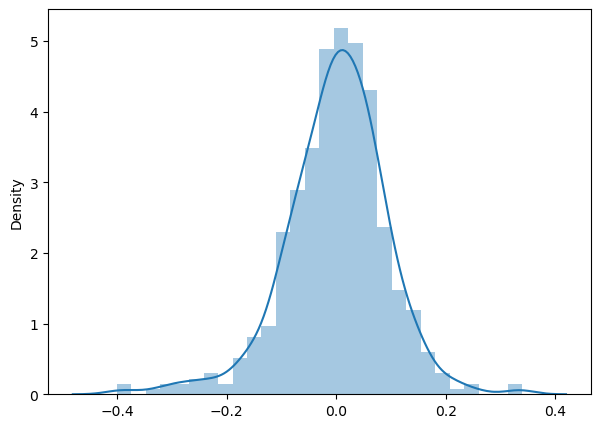

In [81]:
plt.figure(figsize=(7,5))

sns.distplot(res);

**A normal distribution curve with a mean value of almost zero. The primary conditions of the linear regression model are established here.**

### Model Evaluation

Now the real test, to predict the test dataset

In [82]:
y_test_pred = lm6.predict(X_test)

In [83]:
res1 = y_test - y_test_pred

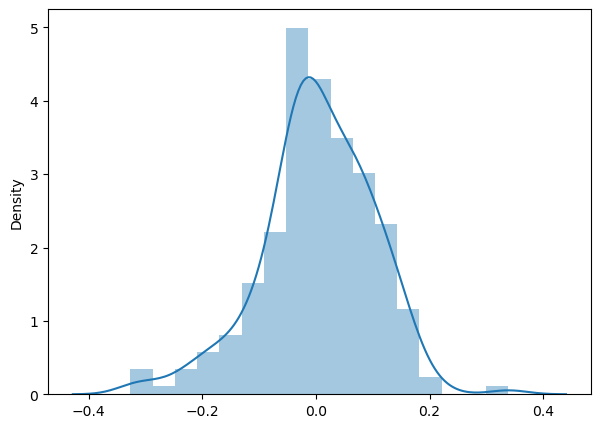

In [84]:
plt.figure(figsize=(7,5))
sns.distplot(res1);

This one is decent enought too we can go with it 

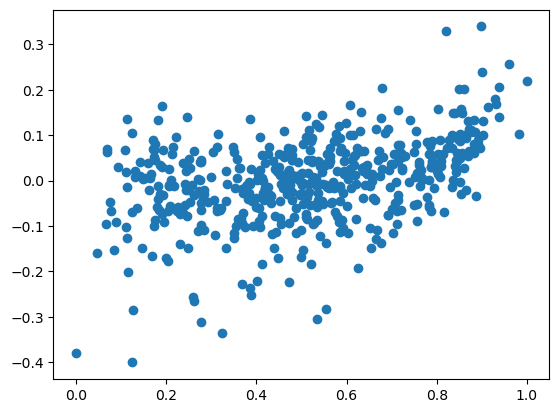

In [85]:
#checking constant variance in error terms (homoscedasticity)
plt.scatter(y_train,res);

lets check and compare the R-square and adjusted R-square score of both train and test datasets

In [86]:
from sklearn.metrics import r2_score
print('R2 score of train data- ',r2_score(y_train,y_train_pred))
print('R2 score of test data-  ',r2_score(y_test,y_test_pred))

R2 score of train data-  0.8286063702034496
R2 score of test data-   0.7942520929837101


In [87]:
Adj_r2_test = 1 - (1-r2_score(y_test, y_test_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_r2_train = 1 - (1-r2_score(y_train, y_train_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

In [88]:
print('adjusted R2 score of train data- ',Adj_r2_train)
print('adjusted R2 score of test data-  ',Adj_r2_test)

adjusted R2 score of train data-  0.8248205671356543
adjusted R2 score of test data-   0.783371194054964


**Following things can be observed**

- Difference in R-squared scores between train and test: 5%
- Difference in adjusted R2 scores between train and test: 1%
- Reseduals are normally distributed for both train and test datasets with mean appx.= 0

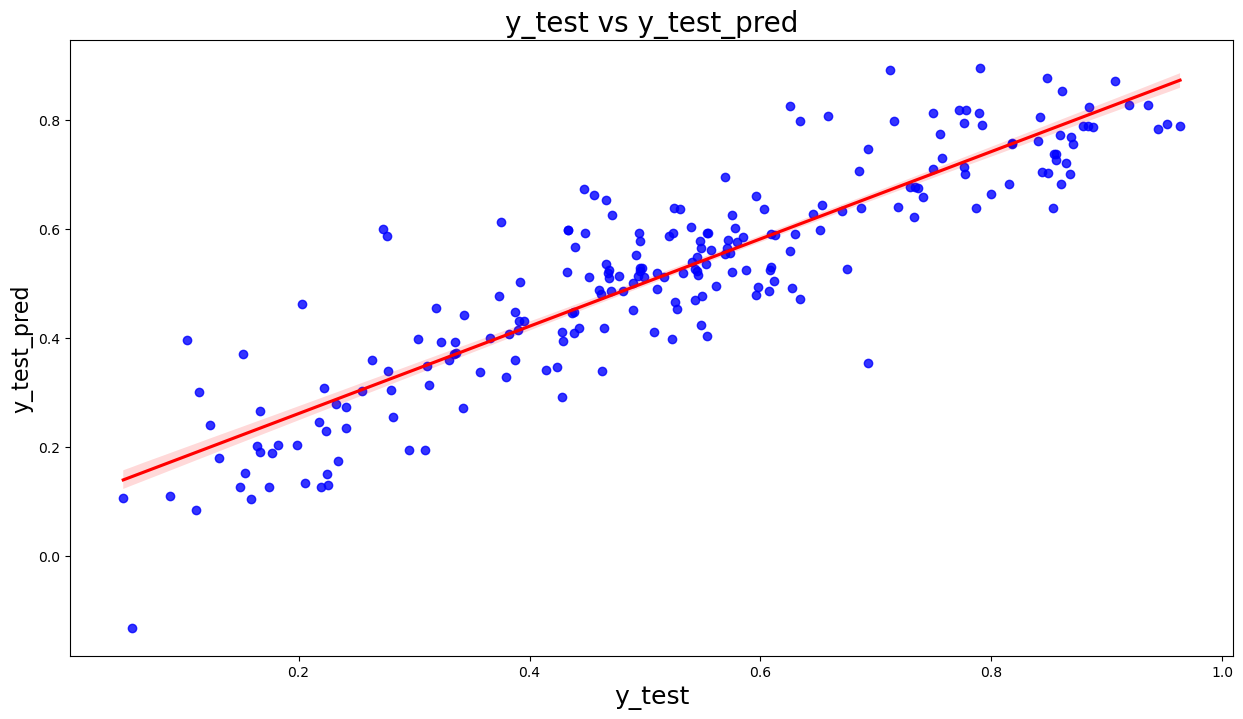

In [89]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()


### Interpretation and suggestion to business

The model performed well, we were able to reduce number of variables to 12(11 features & a constant) from 30 originally, however this can further be refined by using advanced feature selection techniques like LASSO and optimal parameters can be found using GridsearchCV.

the equation looks like

### 𝑇𝑜𝑡𝑎𝑙𝑏𝑖𝑘𝑒𝑠=0.4746×𝑎𝑡𝑒𝑚𝑝+0.10546×𝑆𝑒𝑝𝑡𝑒𝑚𝑏𝑒𝑟+0.0692×𝑠𝑢𝑚𝑚𝑒𝑟+0.0947×𝑤𝑖𝑛𝑡𝑒𝑟+0.2347×𝑌𝑒𝑎𝑟−0.0920×ℎ𝑜𝑙𝑖𝑑𝑎𝑦−0.13536×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑−0.0553×𝑠𝑝𝑟𝑖𝑛𝑔−0.0816×𝑐𝑙𝑜𝑢𝑑𝑦−0.2792×𝑙𝑖𝑔ℎ𝑡𝑟𝑎𝑖𝑛+0.0497×𝑎𝑢𝑔𝑢𝑠𝑡+0.1964×𝑐𝑜𝑛𝑠𝑡

## Business suggestions

- The most important thing is temperature, Boombiker's spinning on hot days can save money by spending less.
- September numbers are on the rise because the United States has had a pleasant September with warm sunshine and clear blue skies for most of September. This can be used to increase capacity and maybe they can market their products heavily before September so they can get more users.
- shows that there is a positive relationship, which shows that awareness of the product is increasing and people are using it more, but the decline in the last few months may also be due to this There are fears about Coronavirus because this is a "sharing" product company, so making people safer You can use many corona-related safety measures for your health.
- Along with light rain, wind speed is also one of the most important factors, but this cannot be controlled and we can reduce resources to areas where this occurs regularly.
    - During the summer months, the nation's wettest weather spreads north to Iowa, West Virginia and New Jersey. During the fall and winter, northern coastal states such as Washington, Massachusetts, and Rhode Island are among the ten wettest states.
    - Hawaii overall is the rainiest state in the US